In [1]:
# to check the version installed in your computer:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.1', 'qiskit-aer': '0.8.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.2', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# S01E02, How to Install Qiskit — Programming on Quantum Computers Season 1 Ep 2

<https://www.youtube.com/watch?v=M4EkW4VwhcI>

How to install Qiskit, the open source quantum computing framework, onto a Mac, Windows and Linux machine.

# S01E03, Hello World — Programming on Quantum Computers Season 1 Ep 3

<https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3>

In this video, you will build your first quantum circuit and learn how to create entanglement between 2 qubits.

In [2]:
from qiskit import *

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('b326ce3172a0cb75842509bd88ef2e4180056230553f8320952394a59c6e7f8d9289807b4198534c928f98a457155ad53bce14fcabc75e3518501c26ccfc190a')

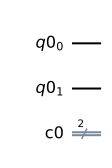

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.draw()

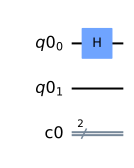

In [4]:
# build a gate
# create entanglement, with Hadamar
circuit.h(qr[0])
circuit.draw(output='mpl')

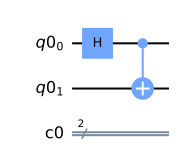

In [5]:
# create two qubit operation: CX
# like clasical if
# control and target
# if control qubit == 1 then CNOT target qubit
# control is first qubit
# target is second qubit
circuit.cx(qr[0], qr[1])
circuit.draw()
# THIS SHOULD HAVE CREATED ENTANGLEMENT BETWEEN THE TWO QUBITS!! (1/sqrt(2)|00> + 1/sqrt(2)|11>)

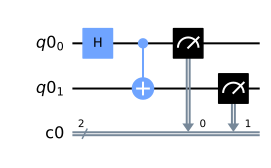

In [6]:
# measure -> store qubits in classical bits => collapse
circuit.measure(qr, cr)
circuit.draw()

In [10]:
# Now run the circuit
# FIRST, in simulator
# SECOND, in real computer
simulator = Aer.get_backend('qasm_simulator')


In [13]:
result = execute(circuit, backend = simulator).result()

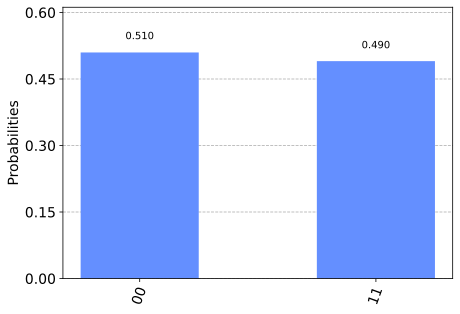

In [14]:
# to see how the results look like
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))

In [18]:
# to use the real computer, load the IBM account

from qiskit import IBMQ
# account was saved
# #IBMQ.save_account('b326ce3172a0cb75842509bd88ef2e4180056230553f8320952394a59c6e7f8d9289807b4198534c928f98a457155ad53bce14fcabc75e3518501c26ccfc190a')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [29]:
# get a computer
# https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq
# https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html

provider = IBMQ.get_provider('ibm-q')
#qcomp = provider.get_backend('ibmq_16_melbourne')
qcomp = provider.get_backend('ibmq_belem')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [30]:
job = execute(circuit, backend=qcomp)

In [34]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)
#status = backend.status()
#is_operational = status.operational
#jobs_in_queue = status.pending_jobs

#  see the number of remaining jobs you are able to submit to the backend with the job_limit() method, which returns a BackendJobLimit instance
job_limit = backend.job_limit()

Job Status: job has successfully run


NameError: name 'backend' is not defined

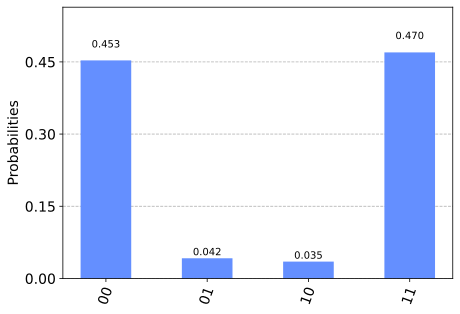

In [36]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# S01E04, Building Blocks of Quantum Circuits — Programming on Quantum Computers Season 1 Ep 4

<https://www.youtube.com/watch?v=tBnWG_95F9c>


Code used – <http://ibm.biz/cwq-gates​>

Gates overview – <http://ibm.biz/q-gates-overview>

In [1]:
from qiskit import *

In [21]:
# different way to display quantum state #1
# bra-ket
# X|0> = |1>
# X|1> = |0>

In [ ]:
# different way to display quantum state #2
# linear algebra
# Matrix
# |0 1| |1|   |0|
# |1 0| |0| = |1|

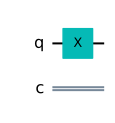

In [2]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.draw()

In [4]:
simulator = Aer.get_backend('statevector_simulator')

[0.+0.j 1.+0.j]


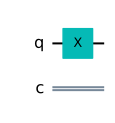

In [7]:
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
circuit.draw(output='mpl')

/workspace/qiskit_notebook/.venv/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


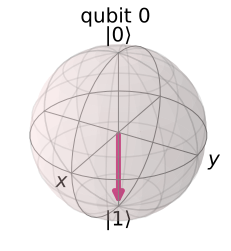

In [23]:
# different way to display quantum state #3
# Bloch sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

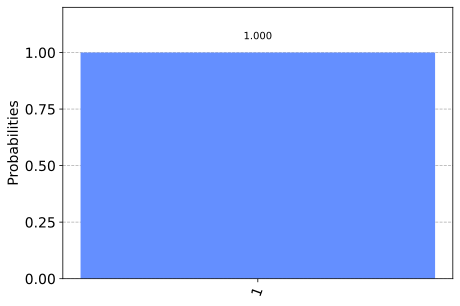

In [24]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)


[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


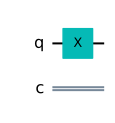

In [19]:
# different way to display quantum state #4
# Matrix
circuit = QuantumCircuit(1, 1)
circuit.x(0)
#circuit.draw()
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)
circuit.draw()

In [25]:
# Version
# It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.1', 'qiskit-aer': '0.8.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.2', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# S01E05, Quantum Teleportation Algorithm — Programming on Quantum Computers Season 1Ep 5

<https://www.youtube.com/watch?v=mMwovHK2NrE>

Code used – <http://ibm.biz/cwq-teleportation>